# __Unsupervised Learning and Preprocessing__

Unsupervised learning subsumes all kinds of machine
learning where there is no known output, no teacher to instruct the learning algorithm. In unsupervised learning, the learning algorithm is just shown the input data
and asked to extract knowledge from this data.

__Unsupervised transformations__ of a dataset are algorithms that create a new representa‐
tion of the data which might be easier for humans or other machine learning algo‐
rithms to understand compared to the original representation of the data. A common
application of unsupervised transformations is dimensionality reduction, which takes
a high-dimensional representation of the data, consisting of many features, and finds
a new way to represent this data that summarizes the essential characteristics with
fewer features. A common application for dimensionality reduction is reduction to
two dimensions for visualization purposes.

__Clustering algorithms__, on the other hand, partition data into distinct groups of similar
items.

Unsupervised algorithms are used often in an exploratory setting,
when a data scientist wants to understand the data better, rather than as part of a
larger automatic system. Another common application for unsupervised algorithms
is as a preprocessing step for supervised algorithms. Learning a new representation of
the data can sometimes improve the accuracy of supervised algorithms, or can lead to
reduced memory and time consumption.

## __Preprocessing and Scaling__

In [1]:
import mglearn
import numpy as np

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


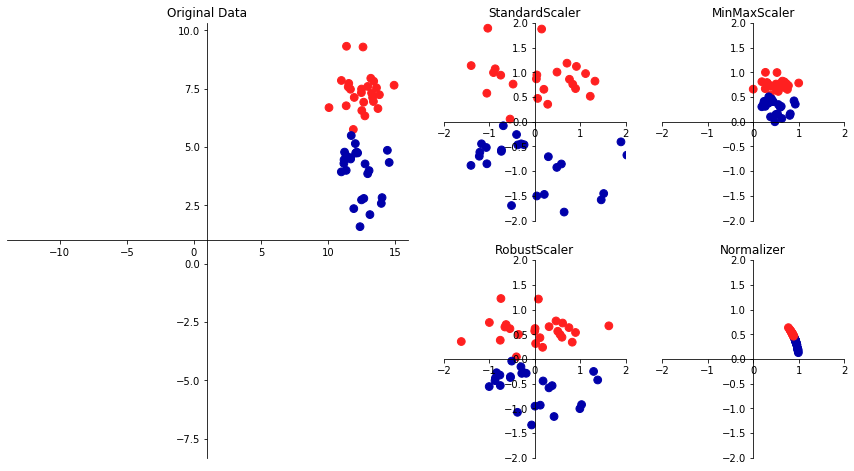

In [2]:
mglearn.plots.plot_scaling()

The __StandardScaler__ in scikit-learn ensures that for each
feature the mean is 0 and the variance is 1, bringing all features to the same magnitude.

The __RobustScaler__ works similarly to the __StandardScaler__ in
that it ensures statistical properties for each feature that guarantee that they are on the
same scale. However, the __RobustScaler__ uses the median and quartiles, 1 instead of
mean and variance. This makes the RobustScaler ignore data points that are very
different from the rest (like measurement errors). These odd data points are also
called outliers, and can lead to trouble for other scaling techniques.

The __MinMaxScaler__ , on the other hand, shifts the data such that all features are exactly
between 0 and 1. For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis
between 0 and 1.

Finally, the __Normalizer__ does a very different kind of rescaling. It scales each data
point such that the feature vector has a Euclidean length of 1. In other words, it
projects a data point on the circle (or sphere, in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of its length). This normalization is often used when only the direction (or
angle) of the data matters, not the length of the feature vector.

### __Applying Dta Transformation__

Preprocessing methods like the scalers are usually applied before applying a supervised
machine learning algorithm. As an example, say we want to apply the kernel SVM
( SVC ) to the cancer dataset, and use MinMaxScaler for preprocessing the data. We
start by loading our dataset and splitting it into a training set and a test set (we need
separate training and test sets to evaluate the supervised model we will build after the
preprocessing):

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

In [4]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)

X_train.shape:  (426, 30)
X_test.shape:  (143, 30)


In [5]:
# importting scaler and instanciating it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

We then fit the scaler using the fit method, applied to the training data. For the Min MaxScaler , the fit method computes the minimum and maximum value of each feature on the training set.

In [6]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
# to apply the transformation, we use the transform method of the scaler
# transform data
X_train_scaled = scaler.transform(X_train)

# print dataset properties befor and after scaling
print('transformed shape: ', X_train_scaled.shape)
print('per-feature minimum before scaling:\n', np.array(X_train.min(axis = 0)))
print('per-feature maximum before scaling:\n', X_train.max(axis = 0))
print('per-feature minimum after scaling:\n', X_train_scaled.min(axis = 0))
print('per-feature maximum after scaling:\n', X_train_scaled.max(axis = 0))

transformed shape:  (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


The transformed data has the same shape as the original data—the features are simply
shifted and scaled.

In [8]:
# transofrm test data
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling
print('per-feature minimum after scaling:\n', X_test_scaled.min(axis = 0))
print('per-feature maximum after scaling:\n', X_test_scaled.max(axis = 0))

per-feature minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the minimum and maximum are not 0 and 1. Some of the features are even outside the 0–1
range! The explanation is that the __MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set. This means
the transform method always subtracts the training set minimum and divides by the
training set range, which might be different from the minimum and range for the test
set.__

### __Scaling Training and Test Data the Same Way__

__It is important to apply exactly the same transformation to the training set and the
test set for the supervised model to work on the test set__. The following example
illustrates what would happen if we were to use the minimum and range
of the test set instead:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

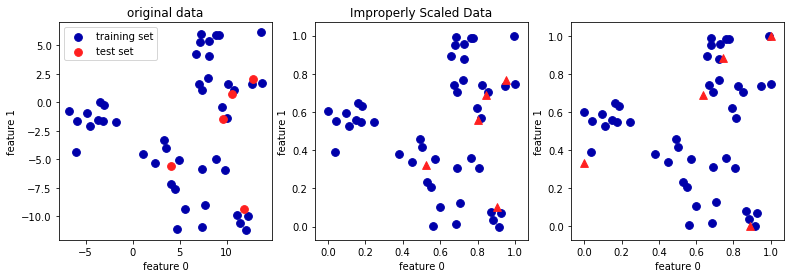

In [9]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# make synthetic data
X, __ = make_blobs(n_samples = 50, centers = 5, random_state = 4, cluster_std = 2)

# split it into training and test sets
X_train, X_test = train_test_split(X, random_state = 5, test_size = 0.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize = (13, 4))

axes[0].scatter(
    X_train[:, 0], X_train[:, 1], c = mglearn.cm2(0), label = 'training set', s = 60
)
axes[0].scatter(
    X_test[:, 0], X_test[:, 1], c = mglearn.cm2(1), label = 'test set', s = 60
)

axes[0].legend(loc = 'upper left')
axes[0].set_title('original data')

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(
    X_train_scaled[:, 0], X_train_scaled[:, 1],c = mglearn.cm2(0), label = "Training set", s = 60
)
axes[1].scatter(
    X_test_scaled[:, 0], X_test_scaled[:, 1], marker = '^', c = mglearn.cm2(1), label = "Test set", s = 60
)
axes[1].set_title("Scaled Data")


# re-scale the test set separately
# so test set min is 0 and test set max is 1
# just for illustration purposes
test_scaler = MinMaxScaler().fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(
    X_train_scaled[:, 0], X_train_scaled[:, 1],c = mglearn.cm2(0), label = "Training set", s = 60
)
axes[2].scatter(
    X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker = '^', c = mglearn.cm2(1), label = "Test set", s = 60
)
axes[1].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

The third panel shows what would happen if we scaled the training set and test set
separately. In this case, the minimum and maximum feature values for both the train‐
ing and the test set are 0 and 1. But now the dataset looks different. The test points
moved incongruously to the training set, as they were scaled differently. We changed
the arrangement of the data in an arbitrary way. Clearly this is not what we want to
do.

In [10]:
# we can use a shhortcut and more efficient manner
# of fitting and transforming the dataset using fit_transform() method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)

# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

# While fit_transform is not necessarily more efficient for all models, it is still good
# practice to use this method when trying to transform the training set.

### __The Effect of Preprocessing on Supervised Learning__

In [11]:
# let's use MinMaxScaler on learning the SVC
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svm = SVC(C = 100)
svm.fit(X_train, y_train)
print(f'test set accuracy: {svm.score(X_test, y_test):.3f}')

test set accuracy: 0.944


In [12]:
# now let's scale the data using MinMaxScaler before fitting the SVC
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print(f'test set accuracy: {svm.score(X_test_scaled, y_test):.3f}')

test set accuracy: 0.965


In [13]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled trainign data
svm.fit(X_train_scaled, y_train)

# scaring on the scaled test set
print(f'SVM test accuracy: {svm.score(X_test_scaled, y_test):.3f}')

SVM test accuracy: 0.958


### __Dimensionality Reduction, Feature Extraction, and Manifold Learning__

As we discussed earlier, transforming data using unsupervised learning can have
many motivations. The most common motivations are visualization, compressing the
data, and finding a representation that is more informative for further processing.
One of the simplest and most widely used algorithms for all of these is principal com‐
ponent analysis. We’ll also look at two other algorithms: non-negative matrix factori‐
zation (NMF), which is commonly used for feature extraction, and t-SNE, which is
commonly used for visualization using two-dimensional scatter plots.

### __Principal component Analysis (PCA)__

Principal component analysis is a method that rotates the dataset in a way such that
the rotated features are statistically uncorrelated. This rotation is often followed by
selecting only a subset of the new features, according to how important they are for
explaining the data.

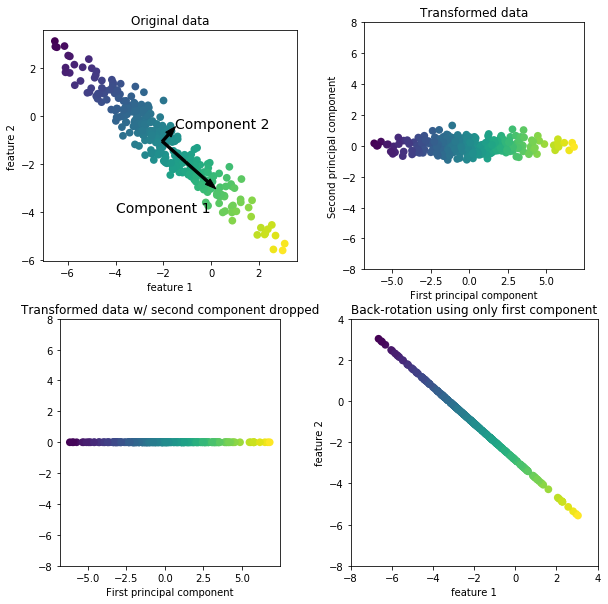

In [14]:
mglearn.plots.plot_pca_illustration()

- The algorithm proceeds by first finding the direction of maximum variance,
labeled “Component 1.” This is the direction (or vector) in the data that contains most
of the information, or in other words, the direction along which the features are most
correlated with each other.

- Then, the algorithm finds the direction that contains the
most information while being orthogonal (at a right angle) to the first direction.

The directions found using this pro‐
cess are called principal components, as they are the main directions of variance in the
data. In general, there are as many principal components as original features.

#### __Applying PCA to cancer dataset for visualization__

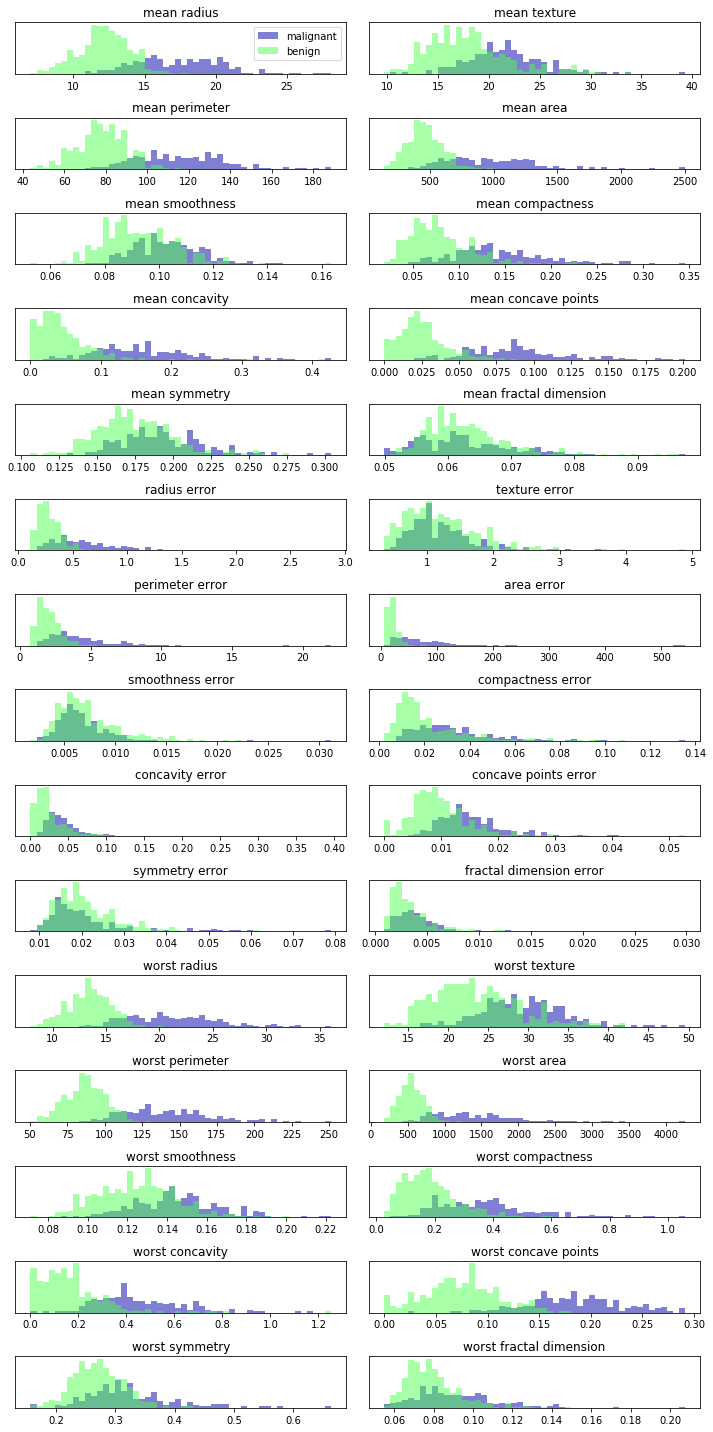

In [15]:
# compute histograms of each of the features for the two classes,
# beningn and malign cancer
import matplotlib.pyplot as plt

fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(0, 30):
    __, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = 0.5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].legend(["malignant", "benign"], loc = 'best')
fig.tight_layout()

This gives us some idea of how each feature is distributed
across the two classes, and allows us to venture a guess as to which features are better
at distinguishing malignant and benign samples. For example, the feature “smooth‐
ness error” seems quite uninformative, because the two histograms mostly overlap,
while the feature “worst concave points” seems quite informative, because the histo‐
grams are quite disjoint.
However, this plot doesn’t show us anything about the interactions between variables
and how these relate to the classes. Using PCA, we can capture the main interactions
and get a slightly more complete picture. We can find the first two principal compo‐
nents, and visualize the data in this new two-dimensional space with a single scatter
plot.

In [16]:
# before applying PCA, we scale our data
# so that each feature has unit variance
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [17]:
# apply PCA
from sklearn.decomposition import PCA

# keep the frist two principal components of the data
pca = PCA(n_components = 2)

# fit PCA model to beast cancer data
pca.fit(X_scaled)

# trasnform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print(f'original shape: {str(X_scaled.shape)}')
print(f'reduced shape: {str(X_pca.shape)}')

original shape: (569, 30)
reduced shape: (569, 2)


Text(0, 0.5, 'Second Principal Component')

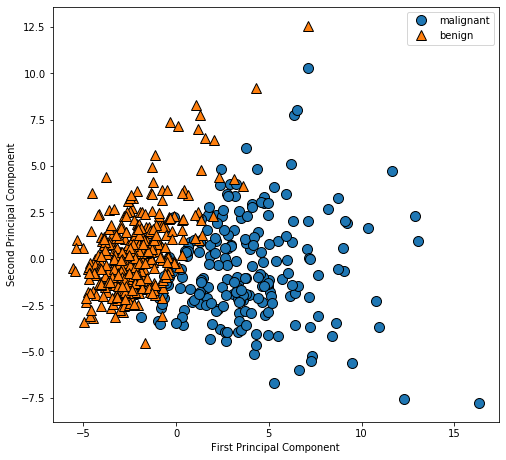

In [18]:
# plot the first two principal components
# colored by class
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc = 'best')
plt.gca().set_aspect('equal')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

It is important to note that PCA is an unsupervised method, and does not use any class
information when finding the rotation. It simply looks at the correlations in the data.

Visually we can note that malignant points are more spread out than the benigng ones.

The principal components correspond to directions in the original data, so they are
combinations of the original features.

In [19]:
print(f'PCA component shape: {pca.components_.shape}')

PCA component shape: (2, 30)


Each row in components_ corresponds to one principal component, and they are sor‐
ted by their importance (the first principal component comes first, etc.). The columns
correspond to the original features attribute of the PCA in this example, “mean
radius,” “mean texture,” and so on. Let’s have a look at the content of `components_` :

In [20]:
print(f'PCA components:\n{pca.components_}')

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal Components')

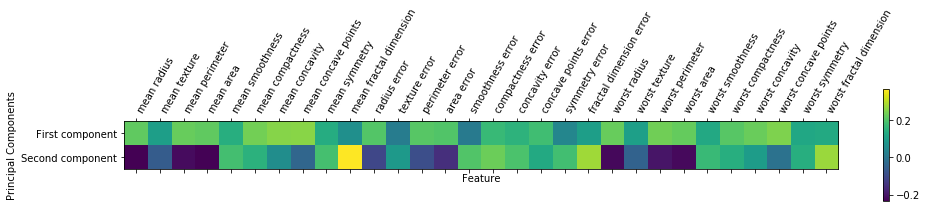

In [21]:
# visualize coefficients using a heat map
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(
    range(len(cancer.feature_names)),
    cancer.feature_names, rotation = 60, ha = 'left'
)
plt.xlabel('Feature')
plt.ylabel('Principal Components')

You can see that in the first component, all features have the same sign (it’s negative,
but as we mentioned earlier, it doesn’t matter which direction the arrow points in).
That means that there is a general correlation between all features. As one measure‐
ment is high, the others are likely to be high as well. The second component has
mixed signs, and both of the components involve all of the 30 features.

### __Eigenfaces for feature extraction__

Another application of PCA that we mentioned earlier is feature extraction. The idea
behind feature extraction is that it is possible to find a representation of your data
that is better suited to analysis than the raw representation you were given. A great
example of an application where feature extraction is helpful is with images. Images
are made up of pixels, usually stored as red, green, and blue (RGB) intensities.
Objects in images are usually made up of thousands of pixels, and only together are
they meaningful.

(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)
(87, 65)


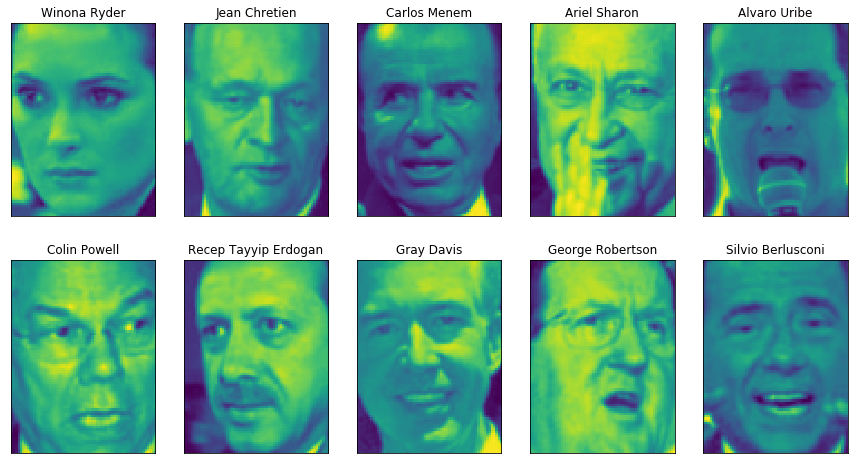

In [22]:
# extract faces images
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shaoe = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize = (15, 8),
                         subplot_kw = {'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    print(image.shape)
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [23]:
print(f'people.images.shape: {people.images.shape}')
print(f'Number of classes: {len(people.target_names)}')

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [24]:
# coutn how often each target appears
counts = np.bincount(people.target)

# prunt counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f'{name:25} {count:3}', end = '     ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39     Alvaro Uribe               35     Amelie Mauresmo            21     
Andre Agassi               36     Angelina Jolie             20     Ariel Sharon               77     
Arnold Schwarzenegger      42     Atal Bihari Vajpayee       24     Bill Clinton               29     
Carlos Menem               21     Colin Powell              236     David Beckham              31     
Donald Rumsfeld           121     George Robertson           22     George W Bush             530     
Gerhard Schroeder         109     Gloria Macapagal Arroyo    44     Gray Davis                 26     
Guillermo Coria            30     Hamid Karzai               22     Hans Blix                  39     
Hugo Chavez                71     Igor Ivanov                20     Jack Straw                 28     
Jacques Chirac             52     Jean Chretien              55     Jennifer Aniston           21     
Jennifer Capriati          42     Jennifer Lopez             21     Jerem

In [25]:
# take up to 50 images of each person
# otherwise the feature extaction would be overwhelmed by
# the likelihod of G. W. Bush
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.0

A common task in face recognition is to ask if a previously unseen face belongs to a
known person from a database. This has applications in photo collection, social
media, and security applications. One way to solve this problem would be to build a
classifier where each person is a separate class. However, there are usually many dif‐
ferent people in face databases, and very few images of the same person (i.e., very few
training examples per class). That makes it hard to train most classifiers. Additionally,
you often want to be able to add new people easily, without needing to retrain a large
model.
A simple solution is to use a one-nearest-neighbor classifier that looks for the most
similar face image to the face you are classifying. This classifier could in principle
work with only a single training example per class. Let’s take a look at how well
`KNeighborsClassifier` does here:

In [26]:
print(X_train[0])
print(X_train[0].shape)
print(X_train.shape)

[1.185e+01 1.746e+01 7.554e+01 4.327e+02 8.372e-02 5.642e-02 2.688e-02
 2.280e-02 1.875e-01 5.715e-02 2.070e-01 1.238e+00 1.234e+00 1.388e+01
 7.595e-03 1.500e-02 1.412e-02 8.578e-03 1.792e-02 1.784e-03 1.306e+01
 2.575e+01 8.435e+01 5.178e+02 1.369e-01 1.758e-01 1.316e-01 9.140e-02
 3.101e-01 7.007e-02]
(30,)
(426, 30)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state = 0
)

# build a KNeighborsClassifier using one neighnor
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

print(f'Test set score of 1-nn: {knn.score(X_test, y_test)}')

Test set score of 1-nn: 0.23255813953488372


We obtain an accuracy of 26.6%, which is not actually that bad for a 62-class classifi‐
cation problem (random guessing would give you around 1/62 = 1.5% accuracy), but
is also not great. We only correctly identify a person every fourth time.

Computing distances in the original pixel space is quite
a bad way to measure similarity between faces. When using a pixel representation to
compare two images, we compare the grayscale value of each individual pixel to the
value of the pixel in the corresponding position in the other image. This representa‐
tion is quite different from how humans would interpret the image of a face, and it is
hard to capture the facial features using this raw representation. For example, using
pixel distances means that shifting a face by one pixel to the right corresponds to a
drastic change, with a completely different representation. We hope that using distan‐
ces along principal components can improve our accuracy. Here, we enable the
whitening option of PCA, which rescales the principal components to have the same
scale.

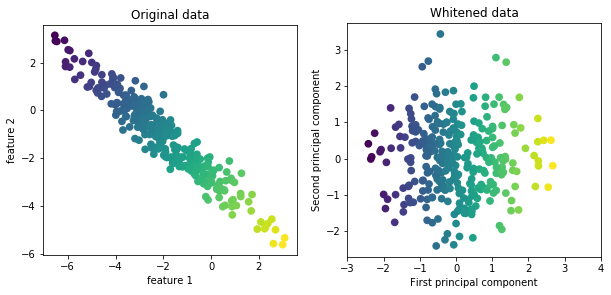

In [28]:
mglearn.plots.plot_pca_whitening()

In [29]:
# fit PCA object to the training data and
# extract the first 100 principal components
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'X_train_pca.shape: {X_train_pca.shape}')

X_train_pca.shape: (1547, 100)


In [30]:
# fit knn classifier to this new transformed data
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print(f'test set accuracy: {knn.score(X_test_pca, y_test)}')

test set accuracy: 0.312015503875969


In [31]:
# improvement on out accuracy on the test set!

In [32]:
# let's look at the first couple of principal components
print(f'pca.components_.shape: {pca.components_.shape}')

pca.components_.shape: (100, 5655)


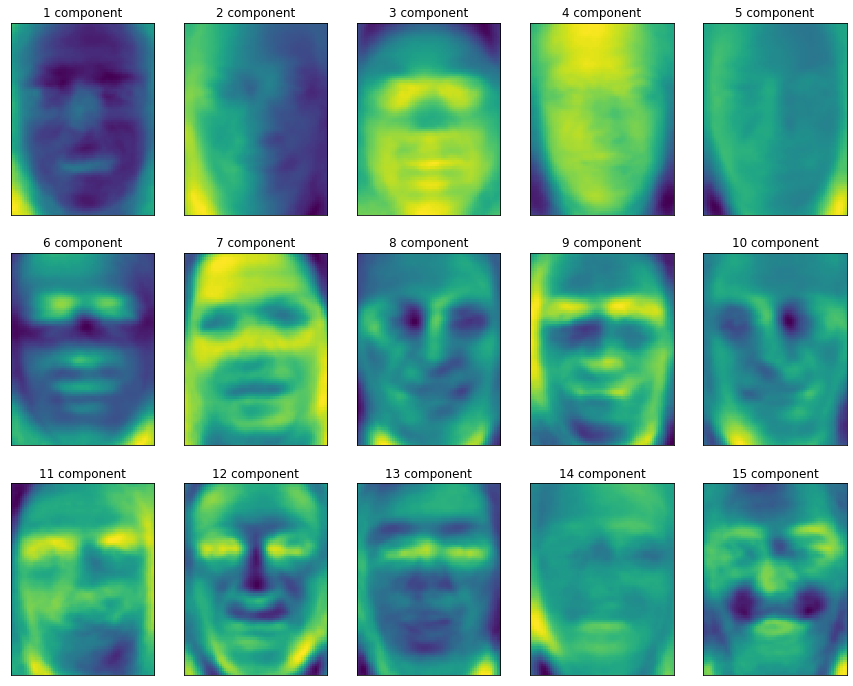

In [33]:
# get the shape of an input image
image_shape = people.images[0].shape

fix, axes = plt.subplots(3, 5, figsize = (15, 12),
                         subplot_kw = {'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
             cmap = 'viridis')
    ax.set_title(f'{i + 1} component')

Another way we can try to understand what a PCA model is doing is by looking at
the reconstructions of the original data using only some components.

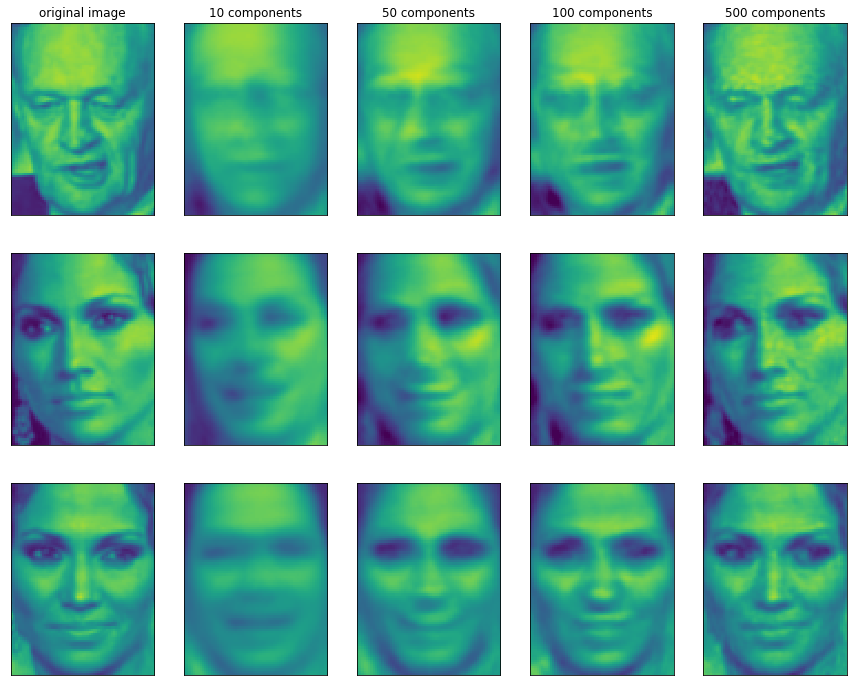

In [34]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

You can see that when we use only the first 10 principal components, only the essence
of the picture, like the face orientation and lighting, is captured. By using more and
more principal components, more and more details in the image are preserved.

We can also try to use PCA to visualize all the faces in the dataset in a scatter plot
using the first two principal components  with classes given by who is
shown in the image, similarly to what we did for the cancer dataset:

Text(0, 0.5, 'Second principal component')

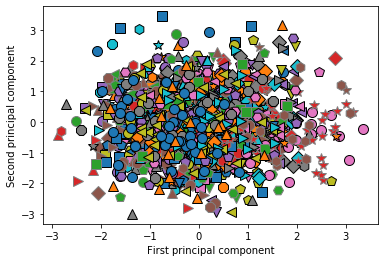

In [35]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

As you can see, when we use only the first two principal components the whole data
is just a big blob, with no separation of classes visible. This is not very surprising,
given that even with 10 components, as shown earlier, PCA only captures very rough characteristics of the faces.

### __Non-Negative Matrix Factorization (NMF)__

Non-negative matrix factorization is another unsupervised learning algorithm that
aims to extract useful features. It works similarly to PCA and can also be used for
dimensionality reduction. As in PCA, we are trying to write each data point as a
weighted sum of some components. But whereas in PCA
we wanted components that were orthogonal and that explained as much variance of
the data as possible, in NMF, we want the components and the coefficients to be non-
negative; that is, we want both the components and the coefficients to be greater than
or equal to zero. Consequently, this method can only be applied to data where each
feature is non-negative, as a non-negative sum of non-negative components cannot
become negative.

The process of decomposing data into a non-negative weighted sum is particularly
helpful for data that is created as the addition (or overlay) of several independent
sources, such as an audio track of multiple people speaking, or music with many
instruments. In these situations, NMF can identify the original components that
make up the combined data. Overall, NMF leads to more interpretable components
than PCA, as negative components and coefficients can lead to hard-to-interpret cancellation effects.

In contrast to when using PCA, we need to ensure that our data is positive for NMF
to be able to operate on the data. This means where the data lies relative to the origin
(0, 0) actually matters for NMF. Therefore, you can think of the non-negative components that are extracted as directions from (0, 0) toward the data.

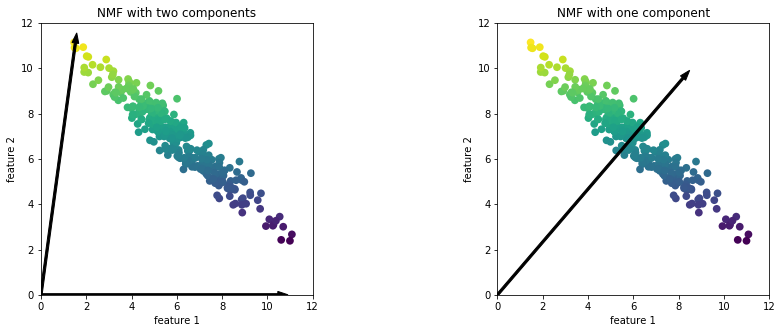

In [36]:
mglearn.plots.plot_nmf_illustration()

For NMF with two components, as shown on the left, it is clear that all points in the
data can be written as a positive combination of the two components. If there are
enough components to perfectly reconstruct the data (as many components as there
are features), the algorithm will choose directions that point toward the extremes of
the data.

If we only use a single component, NMF creates a component that points toward the
mean, as pointing there best explains the data. You can see that in contrast with PCA,
reducing the number of components not only removes some directions, but creates
an entirely different set of components! Components in NMF are also not ordered in
any specific way, so there is no “first non-negative component”: all components play
an equal part.

NMF uses a random initialization, which might lead to different results depending on
the random seed. In relatively simple cases such as the synthetic data with two com‐
ponents, where all the data can be explained perfectly, the randomness has little effect
(though it might change the order or scale of the components). In more complex situations, there might be more drastic changes.

Now, let’s apply NMF to the Labeled Faces in the Wild dataset we used earlier. The
main parameter of NMF is how many components we want to extract. Usually this is
lower than the number of input features (otherwise, the data could be explained by
making each pixel a separate component).

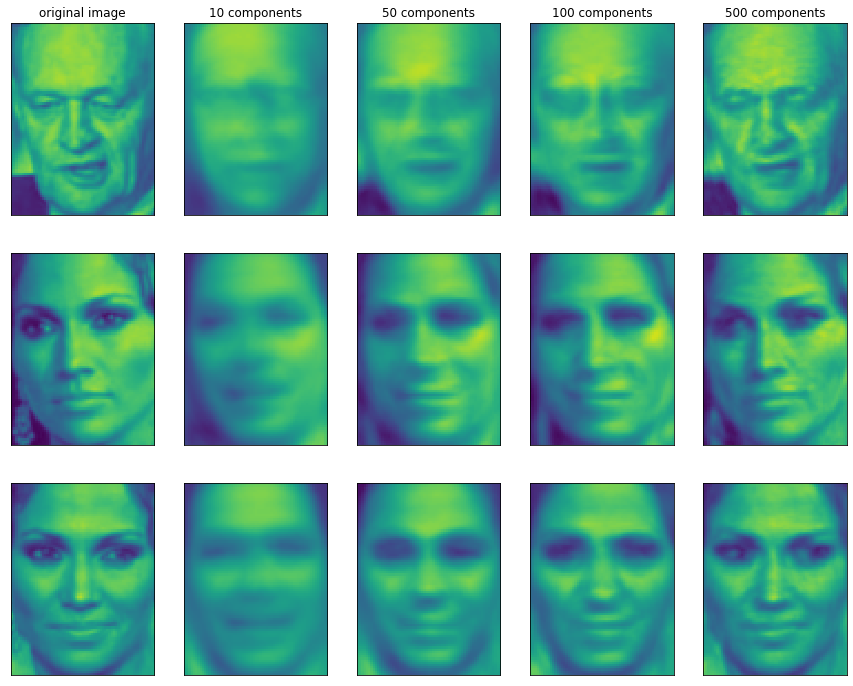

In [37]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

The quality of the back-transformed data is similar to when using PCA, but slightly
worse. This is expected, as PCA finds the optimum directions in terms of reconstruction. NMF is usually not used for its ability to reconstruct or encode data, but rather
for finding interesting patterns within the data.

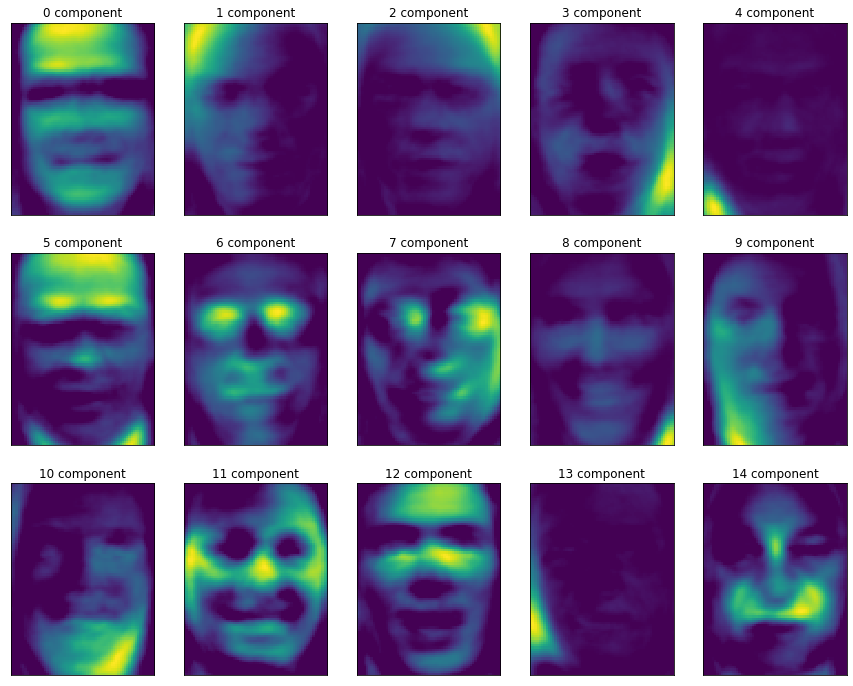

In [38]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 15, random_state = 0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize = (15, 12),
                         subplot_kw = {'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title(f'{i} component')

These components are all positive, and so resemble prototypes of faces much more so
than the components shown for PCA. For example, one can clearly see
that component 3 shows a face rotated somewhat to the right, while component 7
shows a face somewhat rotated to the left. Let’s look at the images for which these
components are particularly strong.

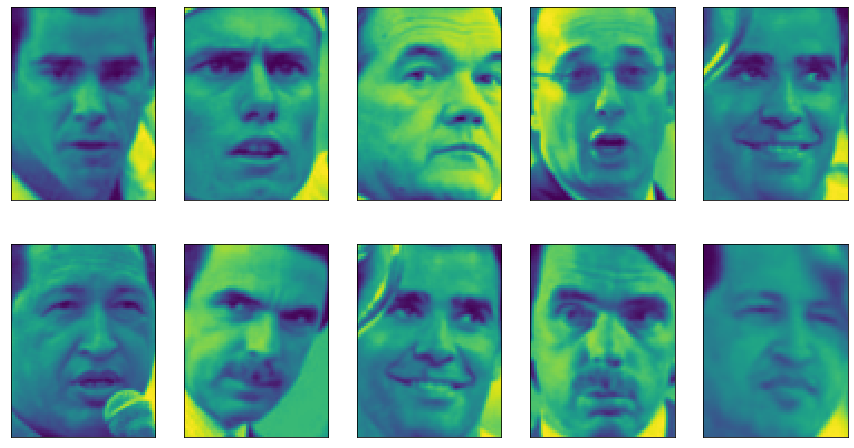

In [39]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8),
                         subplot_kw = {'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

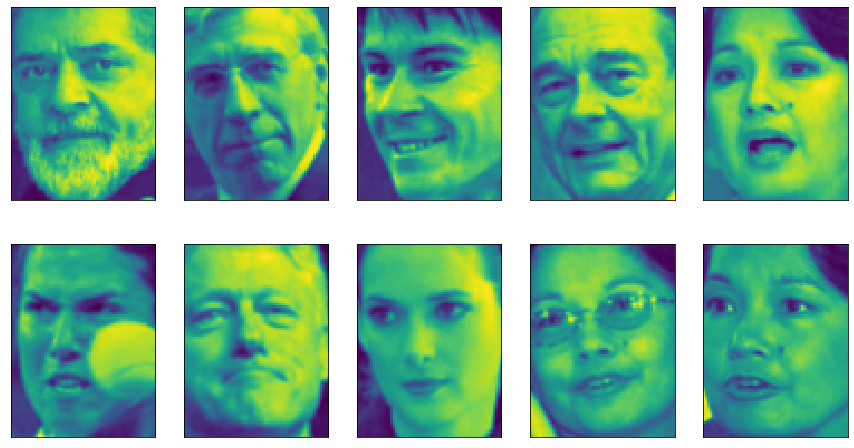

In [40]:
compn = 7
# sort by 7nth component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8),
                         subplot_kw = {'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

As expected, faces that have a high coefficient for component 3 are faces looking to
the right, while faces with a high coefficient for component 7 are look‐
ing to the left. As mentioned earlier, extracting patterns like these works
best for data with additive structure, including audio, gene expression, and text data.
Let’s walk through one example on synthetic data to see what this might look like.

Text(0, 0.5, 'Signal')

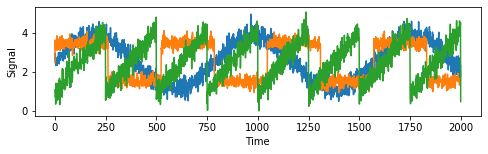

In [41]:
S = mglearn.datasets.make_signals()
plt.figure(figsize = (8, 2))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

Unfortunately we cannot observe the original signals, but only an additive mixture of
all three of them. We want to recover the decomposition of the mixed signal into the
original components. We assume that we have many different ways to observe the
mixture (say 100 measurement devices), each of which provides us with a series of
measurements:

In [42]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size = (100, 3))
X = np.dot(S, A.T)
print(f'Shape of measurement: {X.shape}')

Shape of measurement: (2000, 100)


In [43]:
nmf = NMF(n_components = 3, random_state = 42)
S_ = nmf.fit_transform(X)
print(f'Recovered signal shape: {S_.shape}')

Recovered signal shape: (2000, 3)


In [44]:
# for comparison we also apply PCA
pca = PCA(n_components = 3)
H = pca.fit_transform(X)

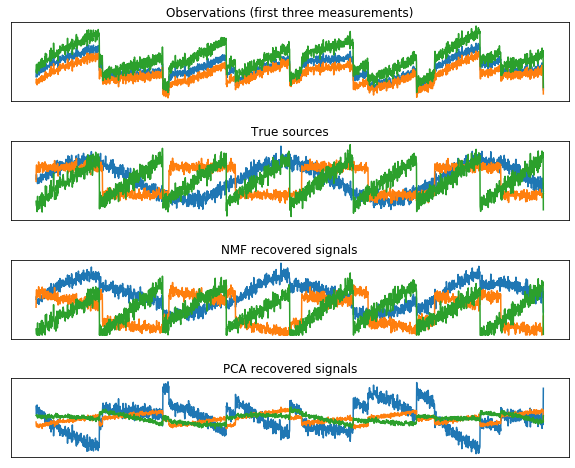

In [45]:
# show signal activities analyzed by NMF and PCA
models = [X, S, S_, H]
names = [
    'Observations (first three measurements)',
    'True sources',
    'NMF recovered signals',
    'PCA recovered signals'
]

fig, axes = plt.subplots(4, figsize = (10, 8), gridspec_kw = {'hspace': 0.5},
                         subplot_kw = {'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

The figure includes 3 of the 100 measurements from X for reference. As you can see,
NMF did a reasonable job of discovering the original sources, while PCA failed and
used the first component to explain the majority of the variation in the data. Keep in
mind that the components produced by NMF have no natural ordering. In this example, the ordering of the NMF components is the same as in the original signal (see the
shading of the three curves), but this is purely accidental.

### __Manifold Learning with t-SNE__

Manifold learning algorithms are mainly aimed at __Visualization__, and so ara rarely
used to generate more than two features. Some of them, inclusing t-SNE, compute a new
representation of the tranining data, but don't allow transformations of new data.
This means these algorithms cannot be applied to a test set: rather __they can only__
__transform the data they were traned for.__ Manifold learning can be useful
for _EDA_, but it's rarely used if the final goal is supervised learning.

The idea begind t-SNE is to find a two-dimensional representation of the data
that preservesthe distances between points as best as possible.

__t-SNE__ starts with a random two-dimensional representation for each data point, and then
tries to ake points that are close in the original feature space closer, and points
that are far apart in the original feature space farther apart. __t-SNE__ puts more
emphasis on points that are close by, rather than preserving distances between far-apart points.
In other words, __it tries to preserve the information indicating which points are neightbors
to each other__.

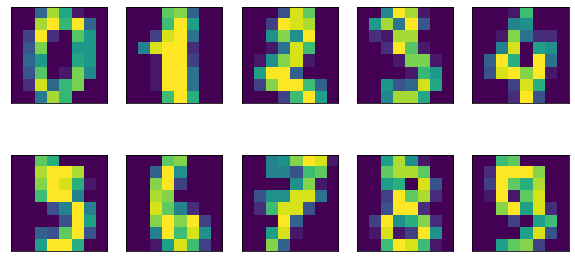

In [47]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize = (10, 5), subplot_kw = {'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

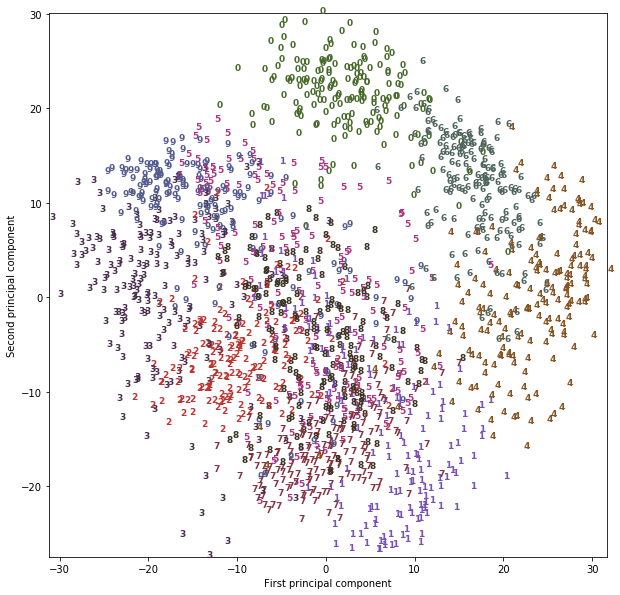

In [49]:
# let's use PCA to visualize the data redices to two dimensions.
# we plot the first two principal components, and color each
# dot by it's class
pca = PCA(n_components = 2)
pca.fit(digits.data)

# transform the digits data onto the first two principal componets
digits_pca = pca.transform(digits.data)
colors = [
    "#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
    "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"
]
plt.figure(figsize = (10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(0, len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(
        digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict = {'weight': 'bold', 'size': 9}
    )

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

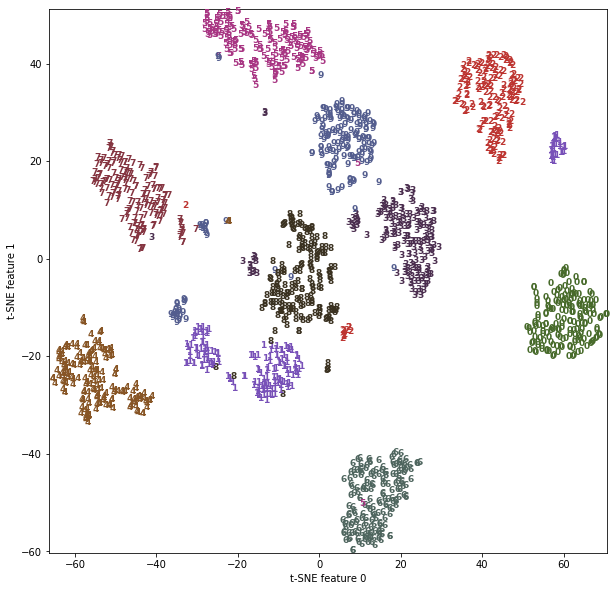

In [50]:
# let's apply t-SNE to the same dataset and compare results.
# As t-SNE does not support transforming new data, the TSNE class
# HAS NO `transform` method.
# instead, we can call the `fit_transform` method, which will build
# the model and immediately return the transformed data
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)

# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize = (10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(0, len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(
        digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
        color = colors[digits.target[i]],
        fontdict = {'weight': 'bold', 'size': 9}
    )
    plt.xlabel('t-SNE feature 0')
    plt.ylabel('t-SNE feature 1')

The result of t-SNE is quite remarkable. All the classes are quite clearly separated.
The ones and nines are somewhat split up, but most of the classes form a single dense
group. Keep in mind that this method has no knowledge of the class labels: it is com‐
pletely unsupervised. Still, it can find a representation of the data in two dimensions
that clearly separates the classes, based solely on how close points are in the original
space.
The t-SNE algorithm has some tuning parameters, though it often works well with
the default settings. You can try playing with `perplexity` and `early_exaggeration` ,
but the effects are usually minor.

## __Clustering__

As we described earlier, _clustering_ is the __task of partitioning the dataset
into groups, called clusters.__ The goal is to __split up the data in such a way
that points within a single cluter are very similar and points in different clusters
are different.__
Similarly to clas‐
sification algorithms, clustering algorithms assign (or predict) a number to each data
point, indicating which cluster a particular point belongs to.

### __K-means Clustering__

_k_-means clustering is one of the simplest and most commonly used clusterign algorithms.
It tries to find __cluster centers__ that are representative of certain regions
of the data.

The algorithms alternates between two steps:
- assigning each data point to the
    closes cluster center
- and then setting each __cluster center__ as the __mean__ of the data poitns
    that are assigned to it. 

The algorithm is finished when the assignment of
instances to clusters no longer changes.

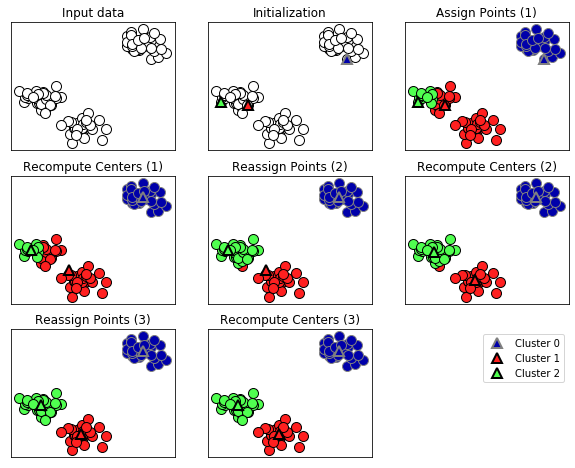

In [53]:
mglearn.plots.plot_kmeans_algorithm()

We specified that we are looking for three clusters, so
the algorithm was initialized by declaring three data points randomly as cluster cen‐
ters (see “Initialization”). Then the iterative algorithm starts. First, each data point is
assigned to the cluster center it is closest to (see “Assign Points (1)”). Next, the cluster
centers are updated to be the mean of the assigned points (see “Recompute Centers
(1)”). Then the process is repeated two more times. After the third iteration, the
assignment of points to cluster centers remained unchanged, so the algorithm stops.

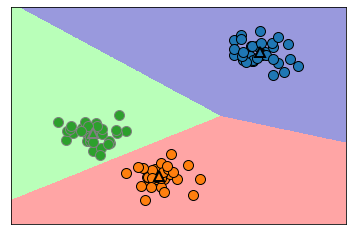

In [54]:
# boundaries of the centers
mglearn.plots.plot_kmeans_boundaries()

In [55]:
# apply k-means in sk-learn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state = 1)

# build the clustering model
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
print(
    f'Cluster memberships:\n{kmeans.labels_}'
)

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [57]:
print(
    kmeans.predict(X)
)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


You can see that clustering is somewhat similar to classification, in that each item gets
a label. However, there is no ground truth, and consequently the labels themselves
have no a priori meaning.

For the clustering we just computed on the two-dimensional toy dataset, that means
that we should not assign any significance to the fact that one group was labeled 0
and another one was labeled 1. Running the algorithm again might result in a differ‐
ent numbering of clusters because of the random nature of the initialization.

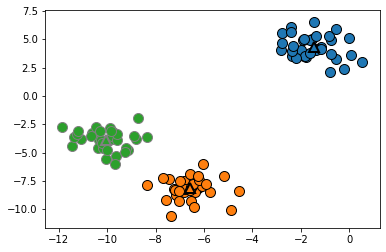

In [59]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers = 'o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers = '^', markeredgewidth = 2
)

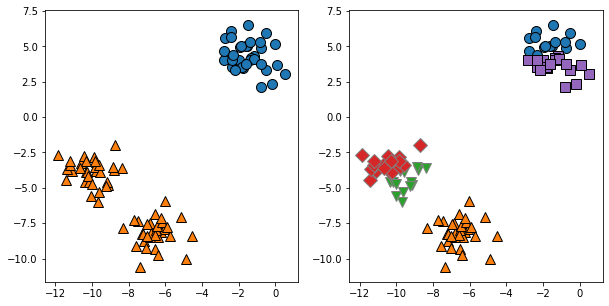

In [61]:
# we can use more or fewer clister centers
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[0])

#using five cluster centers
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax = axes[1])
plt.show()

#### __failure case of _k_-means__

Even if you know the “right” number of clusters for a given dataset, k-means might
not always be able to recover them. Each cluster is defined solely by its center, which
means that each cluster is a convex shape. As a result of this, k-means can only cap‐
ture relatively simple shapes. k-means also assumes that all clusters have the same
“diameter” in some sense; it always draws the boundary between clusters to be exactly
in the middle between the cluster centers.

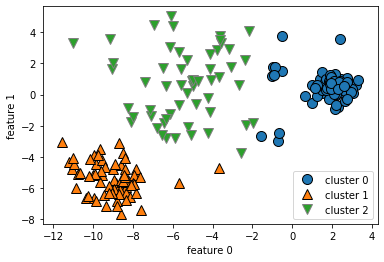

In [65]:
X_varied, y_varied = make_blobs(
    n_samples = 200,
    cluster_std = [1.0, 2.5, 0.5],
    random_state = 170
)
y_pred = KMeans(n_clusters = 3, random_state = 0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

One might have expected the dense region in the lower left to be the first cluster, the
dense region in the upper right to be the second, and the less dense region in the cen‐
ter to be the third. Instead, both cluster 0 and cluster 1 have some points that are far
away from all the other points in these clusters that “reach” toward the center.

k-means also assumes that all directions are equally important for each cluster.

The
following plot shows a two-dimensional dataset where there are three
clearly separated parts in the data. However, these groups are stretched toward the
diagonal. As k-means only considers the distance to the nearest cluster center, it can’t
handle this kind of data:

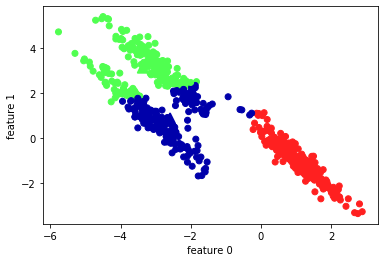

In [69]:
# generate some random cluster data
X, y = make_blobs(random_state = 170, n_samples = 600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size = (2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = mglearn.cm3)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    marker = '^', c = [0, 1, 2], s = 100, linewidth = 2, cmap = mglearn.cm3
)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

k-means also performs poorly if the clusters have more complex shapes

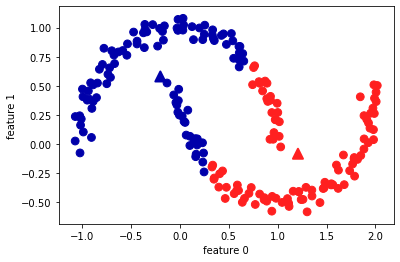

In [73]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(
    X[:, 0], X[:, 1], c = y_pred, cmap = mglearn.cm2, s = 60
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    marker = '^', c = [mglearn.cm2(0), mglearn.cm2(1)], s = 100,
    linewidth = 2
)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

Here, we would hope that the clustering algorithm can discover the two half-moon
shapes. However, this is not possible using the k-means algorithm.

### __Vector quantization, or seeing k-means as decomposition__
Even though k-means is a clustering algorithm, there are interesting parallels between
k-means and the decomposition methods like PCA and NMF that we discussed ear‐
lier. You might remember that PCA tries to find directions of maximum variance in
the data, while NMF tries to find additive components, which often correspond to
“extremes” or “parts” of the data.